In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/'

Mounted at /content/gdrive
/content/gdrive/My Drive


In [2]:
# Step 1
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
# Step 2
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [12]:
# Step 3
train_path = r'../My Drive/Deep Learning/Datasets/dogs_vs_cats/train/train/'
test_path =  r'../My Drive/Deep Learning/Datasets/dogs_vs_cats/train/test/'
valid_path =  r'../My Drive/Deep Learning/Datasets/dogs_vs_cats/train/valid/'

In [13]:
# Step 4
print(os.listdir(train_path))
print(os.listdir(test_path))
print(os.listdir(valid_path))

['dog', 'cat']
['dog', 'cat']
['dog', 'cat']


In [14]:
# Step 5
categories = ['dog', 'cat']
# so that we can use the categories to label our classes

# Simple Image Processing

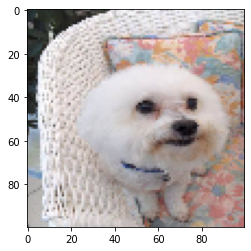

In [17]:
# Step 6
for category in categories:
  path = os.path.join(train_path, category)
  class_num = categories.index(category)

  for img in os.listdir(path):
    img_array = load_img(os.path.join(path, img), target_size=(100, 100))
    new_array = img_to_array(img_array)
    plt.imshow(array_to_img(new_array))
    plt.show()
    break
  break

In [18]:
# Step 7
training_data = []
test_data = []
valid_data = []

def create_training_data(directory, categories, data):
  for category in categories:
    path = os.path.join(directory, category)
    class_num = categories.index(category)

    for img in os.listdir(path):
      try:
        img_array = load_img(os.path.join(path, img), target_size=(100, 100))
        new_array = img_to_array(img_array)
        data.append([new_array, class_num])
      except Exception as e:
        pass

In [19]:
# Step 8
create_training_data(directory= train_path,
                     categories= categories,
                     data = training_data)

create_training_data(directory= test_path,
                     categories= categories,
                     data = test_data)

create_training_data(directory= valid_path,
                     categories= categories,
                     data = valid_data)

In [20]:
print(len(training_data))
print(len(test_data))
print(len(valid_data))

1000
100
200


In [21]:
# Step 9
import random

random.shuffle([training_data, valid_data, test_data])

In [22]:
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [23]:
def get_features_and_labels(data, features, labels):
  for feature, label in data:
    features.append(feature)
    labels.append(label)
  return features, labels